# 정규화 (Regularization) 

## Loading the Housing dataset into a data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/housing2.csv')

df.head()

,CRIM,AN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data_x = df.drop(['MEDV','CRIM','INDUS','CHAS','NOX','AGE','RAD','LSTAT','B'],axis=1)
data_x

,AN,RM,DIS,TAX,PTRATIO
0,18.0,6.575,4.0900,296,15.3
1,0.0,6.421,4.9671,242,17.8
2,0.0,7.185,4.9671,242,17.8
3,0.0,6.998,6.0622,222,18.7
4,0.0,7.147,6.0622,222,18.7
...,...,...,...,...,...
501,0.0,6.593,2.4786,273,21.0
502,0.0,6.120,2.2875,273,21.0
503,0.0,6.976,2.1675,273,21.0
504,0.0,6.794,2.3889,273,21.0


In [3]:
data_y = df['MEDV']
data_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 2024)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [7]:
model_LR.coef_ #X변수의 개수가 5개

array([ 0.05242725,  6.26526268, -0.43619347, -0.01181831, -0.91220825])

In [8]:
model_LR.intercept_

5.843175704312987

In [9]:
model_Lasso1 = Lasso(alpha = 0.3, random_state = 1) #alpha가 람다값(제약정도) Lasso:절대값, Ridge:제곱값
model_Lasso2 = Lasso(alpha = 10.0, random_state = 1)
model_Ridge1 = Ridge(alpha =0.3, random_state = 1)
model_Ridge2 = Ridge(alpha = 10.0, random_state = 1)

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=10.0, random_state=1)

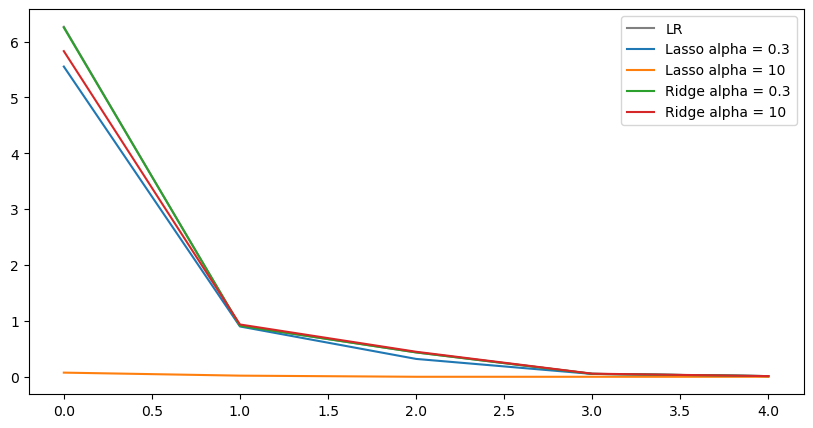

In [11]:
plt.figure(figsize = (10, 5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label = 'LR', c = 'gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label = 'Lasso alpha = 0.3')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label = 'Lasso alpha = 10')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label = 'Ridge alpha = 0.3')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label = 'Ridge alpha = 10')
plt.legend()
plt.show()

In [12]:
model_LR.coef_

array([ 0.05242725,  6.26526268, -0.43619347, -0.01181831, -0.91220825])

In [13]:
model_Lasso1.coef_

array([ 0.05119101,  5.55307823, -0.3197183 , -0.01195166, -0.9004563 ])

In [14]:
model_Lasso2.coef_
#Lasso는 계수가 0인 경우 많아짐(Lasso의 특징)-> 속성 선택의 효과

array([ 0.07429229,  0.        , -0.        , -0.02020804, -0.        ])

In [15]:
model_Ridge1.coef_

array([ 0.05252933,  6.25121945, -0.43658314, -0.0118283 , -0.91300006])

In [16]:
model_Ridge2.coef_
#Ridge는 0에 가까워짐

array([ 0.05559237,  5.8293258 , -0.44790667, -0.01213025, -0.93610568])

In [17]:
mean_squared_error(y_test,model_LR.predict(X_test))

30.76506723632134

In [18]:
mean_squared_error(y_test,model_Lasso1.predict(X_test))

32.76921873274256

In [19]:
mean_squared_error(y_test,model_Lasso2.predict(X_test))

70.80269558741101

In [20]:
mean_squared_error(y_test,model_Ridge1.predict(X_test))

30.79812970891968

In [21]:
mean_squared_error(y_test,model_Ridge2.predict(X_test))

31.878882705869657